In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import markdown as md
from myst_nb import glue


In [2]:
#url = 'https://drive.google.com/file/d/0B6GhBwm5vaB2ekdlZW5WZnppb28/view?usp=sharing'
#path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#df = pd.read_csv(path)
#print(path)

In [3]:
current_directory = os.getcwd()
print("Current directory : ", current_directory)

aymeric =  "/home/aymeric/python-scripts/anses_medialab/datas/" #aymeric
jp = '~/Dropbox/Mac/Desktop/CRD Anses/all3/' # Jean Philippe
jp_index = '~/Dropbox/Mac/Desktop/CRD Anses/code/indexation_results/' # Jean Philippe index

if 'aymeric' in current_directory:
    path_base = aymeric
    index=f"{path_base}index_allall_domainsexhaustive.csv"
elif 'Mac' in current_directory:
    path_base = jp
    index=f'{jp_index}index_allall_domainsexhaustive.csv'
elif 'd:/Projects' in current_directory:
    path_base = "d:/Projects/Medialab/"
    index=f"{path_base}index_allall_domainsexhaustive.csv"

print("Path base : ", path_base)

Current directory :  /home/aymeric/python-scripts/anses_medialab/analyse_mixte/ansesreport
Path base :  /home/aymeric/python-scripts/anses_medialab/datas/


In [4]:
# Chargement des données 

## Le corpus de textes avec comptes annotés
dftext = pd.read_csv(f'{path_base}tweets_and_posts_with_annotated_account.csv', sep = ",", doublequote=True, 
                    dtype={"user_id":str, "id":str})

## Les comptes annotés
df = pd.read_csv(f'/home/aymeric/python-scripts/anses_medialab/datas/all_annotated_account.csv', sep = ",",
          dtype={"user_id":str})


fb_account = df.loc[(df["platform"] == "Facebook") & (df["annoted"] == True)].reset_index()
tw_account = df.loc[(df["platform"] == "twitter") & (df["annoted"] == True)].reset_index()
#print(len(fb_account), len(tw_account))

/home/aymeric/anaconda3/envs/analyse_tweets/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,5,6,7,11,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/aymeric/anaconda3/envs/analyse_tweets/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [127]:
nb_fb_annoted_account = len(df.loc[(df["platform"] == "Facebook") & (df["annoted"] == True)]) #nombre de pages et groupes facebook annotés
nb_tw_annoted_account = len(df.loc[(df["platform"] == "twitter") & (df["annoted"] == True)]) #nombre de comptes twitter annotés


In [9]:
#Facebook
nombre_de_posts = len(dftext.loc[(dftext["platform"] == "Facebook")].drop_duplicates(subset = ["id"]))
glue("nombre_de_posts", nombre_de_posts, display = False)

nb_group = len(dftext.loc[(dftext["platform"] == "Facebook") & (dftext["account_type"] =="facebook_group")].drop_duplicates(subset = ["user_id"])) #Nombre de groupes fb
nb_page = len(dftext.loc[(dftext["platform"] == "Facebook") & (dftext["account_type"] =="facebook_page")].drop_duplicates(subset = ["user_id"])) #Nombre de pages fb
nb_fb_account = nb_page + nb_group #Nombre total de sources fb
#nb_fb_account = len(dftext.loc[(dftext["platform"] == "Facebook")].drop_duplicates(subset = ["user_id"])) # Nombre total de comptes twitter

glue("nombre_de_posts", nombre_de_posts, display = False)
glue("nb_group", nb_group, display = False)
glue("nb_page", nb_page, display = False)
glue("nb_fb_account", nb_fb_account, display = False)

## twitter
nombre_de_tweets = len(dftext.loc[(dftext["platform"] == "twitter")].drop_duplicates(subset = ["id"]))
nb_tw_account = len(dftext.loc[(dftext["platform"] == "twitter")].drop_duplicates(subset = ["user_id"])) # Nombre total de comptes twitter

glue("nombre_de_tweets", nombre_de_tweets, display = False)
glue("nb_tw_account", nb_tw_account, display = False)



In [10]:
##sources twitter avec 10 publications ou plus
sub_tw_account = dftext.loc[(dftext["platform"] == "twitter") & (dftext["account_publication"] >= 10)].drop_duplicates(subset = ["user_id"])

#Nombre de comptes twitter avec 10 publications ou plus
nb_tw_with_10_posts = len(sub_tw_account)


glue("sub_tw_account", sub_tw_account, display = False)
glue("nb_tw_with_10_posts", nb_tw_with_10_posts, display = False)

##sources fb avec 10 publications ou plus
sub_fb_account = dftext.loc[(dftext["platform"] == "Facebook") & (dftext["account_publication"] >= 10)].drop_duplicates(subset = ["user_id"])
glue("sub_fb_account", sub_fb_account, display = False)


#Nombre de groupes fb avec 10 publications ou plus
nb_group_with_10_posts = len(sub_fb_account.loc[sub_fb_account["account_type"] == "facebook_group"]) 
glue("nb_group_with_10_posts", nb_group_with_10_posts, display = False)

#Nombre de pages fb avec 10 publications ou plus
nb_page_with_10_posts = len(sub_fb_account.loc[sub_fb_account["account_type"] == "facebook_page"])
glue("nb_page_with_10_posts", nb_page_with_10_posts, display = False)

#Nombre de sources fb avec 10 publications ou plus
nb_fb_with_10_posts = nb_page_with_10_posts + nb_group_with_10_posts
glue("nb_fb_with_10_posts", nb_fb_with_10_posts, display = False)

#Total des posts et tweets publiés par les comptes ayant 10 publications ou plus
sub_nb_post = len(dftext.loc[(dftext["platform"] == "Facebook") & (dftext["account_publication"] >= 10)].drop_duplicates(subset = ["id"]))
sub_nb_tweets = len(dftext.loc[(dftext["platform"] == "twitter") & (dftext["account_publication"] >= 10)].drop_duplicates(subset = ["id"]))
glue("sub_nb_post", sub_nb_post, display = False)
glue("sub_nb_post", sub_nb_tweets, display = False)

part_of_fb_account_with_10_post = round(nb_fb_with_10_posts/nb_fb_account*100, 1)
part_of_tw_account_with_10_tweets = round(nb_tw_with_10_posts/nb_tw_account*100, 1)
glue("part_of_fb_account_with_10_post", part_of_fb_account_with_10_post, display = False)
glue("part_of_tw_account_with_10_tweets", part_of_tw_account_with_10_tweets, display = False)

contrib_of_fb_account_with_10 = round(sub_nb_post/nombre_de_posts*100, 1)
contrib_of_tw_account_with_10 = round(sub_nb_tweets/nombre_de_tweets*100, 1)
glue("contrib_of_fb_account_with_10", contrib_of_fb_account_with_10, display = False)
glue("contrib_of_fb_account_with_10", contrib_of_fb_account_with_10, display = False)


        platform annoted                   id  \
1        twitter    True  1212156152076787712   
3        twitter   False  1212144705628192768   
4        twitter   False  1212143182022107136   
6        twitter    True  1212139351733350401   
7        twitter   False  1212131615817785346   
...          ...     ...                  ...   
1304791  twitter   False  1248917223021961217   
1310799  twitter   False  1241783878941052929   
1313074  twitter   False  1238437905523265536   
1330503  twitter   False  1226037082881171456   
1350395  twitter   False  1213022773142073349   

                                                      text        date  \
1        @coquelicots_ Déjà faudrait il commencer par n...  2019-12-31   
3        Chuchoteur 2020 (Journal annuel du Collectif I...  2019-12-31   
4        Pesticides: les Coquelicots collent les SDHI! ...  2019-12-31   
6        @PICO2935 Donc le spinosad est une "substance ...  2019-12-31   
7        Deux pesticides ayant le même mo

         platform annoted                                id  \
1490543  Facebook   False   313936256229746_789084422048258   
1490544  Facebook   False  514303375371037_2451245531676802   
1490545  Facebook   False  243631722382545_4897262587019412   
1490547  Facebook   False  588475064661060_2157038831138001   
1490548  Facebook   False  654944398613337_1122246851883087   
...           ...     ...                               ...   
1894791  Facebook   False   130669393676654_509678619109061   
1895259  Facebook   False   229333617134508_538847942849739   
1895265  Facebook   False   296958870375608_518854098186083   
1897626  Facebook   False   117663981593169_644831332209762   
1898459  Facebook   False   249169071785987_501776609858564   

                                                      text        date  \
1490543  nan. TRAITEMENTS INFAILLIBLE CONTRE TOUS LES N...  2022-02-11   
1490544  nan. TRAITEMENTS INFAILLIBLE CONTRE TOUS LES N...  2022-02-11   
1490545  nan. En nous

In [11]:

## Sources twitter avec 10 publications ou plus et 1% de publications sur pesticides
subsub_tw_account = sub_tw_account.loc[(sub_tw_account["ratio_posts"] >= 1) & (sub_tw_account["ratio_posts"] <= 100)].drop_duplicates(subset =["user_id"])
glue("subsub_tw_account", subsub_tw_account, display = False)


#Nombre de sources twitter avec 10 publications ou plus et 1% de publications sur pesticides
nb_tw_with_1percent_posts = len(subsub_tw_account)
glue("nb_tw_with_1percent_posts", nb_tw_with_1percent_posts, display = False)


## Sources fb avec 10 publications ou plus et 1% de publications sur pesticides
subsub_fb_account = sub_fb_account.loc[sub_fb_account["ratio_posts"] >= 1].drop_duplicates(subset =["user_id"])
glue("subsub_fb_account", subsub_fb_account, display = False)

#Nombre de groupes fb avec 10 publications ou plus et 1% de publications sur pesticides
nb_group_with_1percent_posts = len(subsub_fb_account.loc[subsub_fb_account["account_type"] == "facebook_group"])
glue("nb_group_with_1percent_posts", nb_group_with_1percent_posts, display = False)

#Nombre de pages fb avec 10 publications ou plus et 1% de publications sur pesticides
nb_page_with_1percent_posts = len(subsub_fb_account.loc[subsub_fb_account["account_type"] == "facebook_page"])
glue("nb_group_with_1percent_posts", nb_group_with_1percent_posts, display = False)

#Nombre de sources fb avec 10 publications ou plus et 1% de publications sur pesticides
nb_fb_with_1percent_posts = nb_page_with_1percent_posts + nb_group_with_1percent_posts
glue("nb_fb_with_1percent_posts", nb_fb_with_1percent_posts, display = False)


#Total des posts et tweets ubliés par les comptes ayant au moins 1% de publications sur pesticides
onep_sub_nb_post =len(dftext.loc[(dftext["platform"] == "Facebook") & (dftext["ratio_posts"] >= 1) & (dftext["ratio_posts"] <= 100)].drop_duplicates(subset = ["id"]))
onep_sub_nb_tweets = len(dftext.loc[(dftext["platform"] == "twitter") & (dftext["ratio_posts"] >= 1) & (dftext["ratio_posts"] <= 100)].drop_duplicates(subset = ["id"]))
glue("onep_sub_nb_post", onep_sub_nb_post, display = False)
glue("onep_sub_nb_tweets", onep_sub_nb_tweets, display = False)

part_of_fb_account_with_1percent = round(nb_fb_with_1percent_posts/nb_fb_account*100, 1)
part_of_tw_account_with_1percent = round(nb_tw_with_1percent_posts/nb_tw_account*100, 1)
glue("part_of_fb_account_with_1percent", part_of_fb_account_with_1percent, display = False)
glue("part_of_tw_account_with_1percent", part_of_fb_account_with_1percent, display = False)

contrib_of_fb_account_with_10 = round(onep_sub_nb_post/nombre_de_posts*100, 1)
contrib_of_tw_account_with_10 = round(onep_sub_nb_tweets/nombre_de_tweets*100, 1)
glue("contrib_of_fb_account_with_10", contrib_of_fb_account_with_10, display = False)
glue("contrib_of_tw_account_with_10", contrib_of_tw_account_with_10, display = False)

        platform annoted                   id  \
1        twitter    True  1212156152076787712   
3        twitter   False  1212144705628192768   
4        twitter   False  1212143182022107136   
6        twitter    True  1212139351733350401   
9        twitter   False  1212127236154970112   
...          ...     ...                  ...   
1281331  twitter   False  1273602123104690176   
1282278  twitter   False  1273193267111383040   
1284245  twitter   False  1270626617572950021   
1310799  twitter   False  1241783878941052929   
1330503  twitter   False  1226037082881171456   

                                                      text        date  \
1        @coquelicots_ Déjà faudrait il commencer par n...  2019-12-31   
3        Chuchoteur 2020 (Journal annuel du Collectif I...  2019-12-31   
4        Pesticides: les Coquelicots collent les SDHI! ...  2019-12-31   
6        @PICO2935 Donc le spinosad est une "substance ...  2019-12-31   
9        Arrêté anti-pesticides : "J’invi

         platform annoted                                 id  \
1490544  Facebook   False   514303375371037_2451245531676802   
1490545  Facebook   False   243631722382545_4897262587019412   
1490554  Facebook   False    280442222854234_980935209471595   
1490563  Facebook   False    100066504926057_289477449945750   
1490571  Facebook    True   168702849857226_4954507317943398   
...           ...     ...                                ...   
1882819  Facebook   False    200757893337597_724712560942125   
1886960  Facebook   False    352918424841207_508223579310690   
1891801  Facebook   False  278644815585674_10152201708749015   
1893875  Facebook   False    240314342663734_712122572149573   
1897626  Facebook   False    117663981593169_644831332209762   

                                                      text        date  \
1490544  nan. TRAITEMENTS INFAILLIBLE CONTRE TOUS LES N...  2022-02-11   
1490545  nan. En nous appuyant sur des pratiques durabl...  2022-02-11   
1490554  

In [12]:
#import bamboolib
annoted_fb_account = df.loc[(df["platform"] == "Facebook") & (df["annoted"] == True)].reset_index()
annoted_tw_account = df.loc[(df["platform"] == "twitter") & (df["annoted"] == True)].reset_index()
glue("annoted_fb_account", annoted_fb_account, display = False)
glue("annoted_tw_account", annoted_tw_account, display = False)

fb_account = df.loc[(df["platform"] == "Facebook")].reset_index()
tw_account = df.loc[(df["platform"] == "twitter")].reset_index()

glue("fb_account", fb_account, display = False)
glue("tw_account", tw_account, display = False)

glypho_campagne = fb_account["user_name"].iloc[2]
glypho_campagne_nb_pest = fb_account["account_publication"].iloc[2]
glypho_campagne_nb = int(fb_account["total_posts"].iloc[2])
glypho_campagne_ratio = round(fb_account["ratio_posts"].iloc[2], 1)

glue("glypho_campagne", glypho_campagne, display = False)
glue("glypho_campagne_nb_pest", glypho_campagne_nb_pest, display = False)
glue("glypho_campagne_nb", glypho_campagne_nb, display = False)
glue("glypho_campagne_ratio", glypho_campagne_ratio, display = False)

alternatiba = fb_account["user_name"].iloc[2214]
alternatiba_nb_pest = fb_account["account_publication"].iloc[2214]
alternatiba_nb = fb_account["total_posts"].iloc[2214]
alternatiba_ratio = round(fb_account["ratio_posts"].iloc[2214], 1)

glue("alternatiba", alternatiba, display = False)
glue("alternatiba_nb_pest", alternatiba_nb_pest, display = False)
glue("alternatiba_nb", alternatiba_nb, display = False)
glue("alternatiba_ratio", alternatiba_ratio, display = False)

rebellion = fb_account["user_name"].iloc[500]
rebellion_nb_pest = fb_account["account_publication"].iloc[500]
rebellion_nb = int(fb_account["total_posts"].iloc[500])
rebellion_ratio = round(fb_account["ratio_posts"].iloc[500], 1)

glue("rebellion", rebellion, display = False)
glue("rebellion_nb_pest", rebellion_nb_pest, display = False)
glue("rebellion_nb", rebellion_nb, display = False)
glue("rebellion_ratio", rebellion_ratio, display = False)



     index           user_id                           user_account_url  \
0        0  1482404205357954  https://www.facebook.com/1482404205357954   
1        1   157086536071976   https://www.facebook.com/157086536071976   
2        2   578018212607382   https://www.facebook.com/578018212607382   
3        3   580543742458852   https://www.facebook.com/580543742458852   
4        4   104101494871893   https://www.facebook.com/104101494871893   
..     ...               ...                                        ...   
225    404  1007636475986545  https://www.facebook.com/1007636475986545   
226    406   445844852555418   https://www.facebook.com/445844852555418   
227    430      181902555741      https://www.facebook.com/181902555741   
228    441   238008492963770   https://www.facebook.com/238008492963770   
229    603   100063638242896   https://www.facebook.com/282657525527601   

     account_publication  total_posts                     user_name  \
0                   1593    

      index              user_id                     user_account_url  \
0     51346   776804948705153025       https://twitter.com/fermedupre   
1     51351            882404732           https://twitter.com/YveCtx   
2     51357   954848807979769856        https://twitter.com/PaulYment   
3     51359            769414741  https://twitter.com/FestimagesNatur   
4     51374            569232644  https://twitter.com/AlerteEnvironne   
..      ...                  ...                                  ...   
459  204417  1220547607447121920  https://twitter.com/Marcaur41857910   
460  233300            363209437        https://twitter.com/ToutouBio   
461  236754            536816970     https://twitter.com/eau_purifiee   
462  236755            307579962  https://twitter.com/AloeveraBientre   
463  249067           1243510502  https://twitter.com/environnement_1   

     account_publication  total_posts                             user_name  \
0                   1486      18206.0  Olivi

       index           user_id  \
0          0  1482404205357954   
1          1   157086536071976   
2          2   578018212607382   
3          3   580543742458852   
4          4   104101494871893   
...      ...               ...   
51340  51340   414696865370222   
51341  51341   257423891109368   
51342  51342   201993529841614   
51343  51343   100064705627305   
51344  51344   236493433040761   

                                      user_account_url  account_publication  \
0            https://www.facebook.com/1482404205357954                 1593   
1             https://www.facebook.com/157086536071976                   77   
2             https://www.facebook.com/578018212607382                  190   
3             https://www.facebook.com/580543742458852                  254   
4             https://www.facebook.com/104101494871893                  176   
...                                                ...                  ...   
51340  https://www.facebook.com/groups

         index              user_id                user_account_url  \
0        51345            600997333                             NaN   
1        51346   776804948705153025  https://twitter.com/fermedupre   
2        51347   951470420728991744                             NaN   
3        51348   705331587941060608                             NaN   
4        51349           2312970457                             NaN   
...        ...                  ...                             ...   
236665  288010   784048370713264128                             NaN   
236666  288011  1082953215040196608                             NaN   
236667  288012   945683674216923138                             NaN   
236668  288013            334197865                             NaN   
236669  288014   763067805470253056                             NaN   

        account_publication  total_posts  \
0                         8     235217.0   
1                      1486      18206.0   
2              

# La composition des corpus

## Le nombre de pages, groupes (Facebook) et comptes annotés (Twitter)

Le corpus Twitter" est composé de {glue:text}`nombre_de_tweets` tweets publiés par {glue:text}`nb_tw_account`. Le "corpus Facebook" contient quant à lui {glue:}`nombre_de_post` publications produites par {glue:text}`nb_fb_account` comptes, dont {glue:text}`nb_page` pages et {glue:text}`nb_group`. Toutefois, les analyses ci-après portent uniquement sur les {glue:text}`nb_fb_annoted_account` groupes et pages facebook ainsi que les {glue:text}`nb_tw_annoted_account` comptes twitter que nous avons "annoté" à la main. Les comptes ont été choisis de la façon suivante :

1. Pour chacun des corpus (twitter et facebook) de départ, nous avons conservé les comptes avec dix publications ou plus sur le sujet des pesticides.

Cela représente un premier échantillon de {glue:text}`nb_page_with_10_posts` pages et {glue:text}`nb_group_with_10_posts` groupes Facebook, soit {glue:text}`nb_fb_with_10_posts` comptes. Cela représente {glue:text}`part_of_fb_account_with_10_post` % du nombre total de comptes. Ils sont à l'origine de {glue:text}`contrib_of_fb_account_with_10` % des posts du corpus.

Concernant le corpus twitter, on a {glue:text}`nb_tw_with_10_posts` comptes ayant publié dix tweets ou plus, soit {glue:text}`part_of_tw_account_with_10_tweets` % des comptes. Ces {glue:text}`nb_tw_with_10_posts` comptes ont publiés {glue:text}`contrib_of_tw_account_with_10` % des tweets du corpus ({glue:text}`sub_nb_tweets` sur {glue:text}`nombre_de_tweets`).

2. À partir de ce premier sous-ensemble, nous avons calculé un ratio donnant pour chaque compte la part des publications relatives aux pesticides (celles incluses dans le corpus) sur le total de ses publications. 

Ce faisant, on obtient dans le cas du corpus Facebook un second sous-ensemble composé de {glue:text}`nb_page_with_1percent_posts` pages et {glue:text}`nb_group_with_1percent_posts` groupes, soit {glue:text}`nb_fb_with_1percent_posts` comptes. Cela représente {glue:text}`part_of_fb_account_with_1percent` % des comptes, leurs contributions constituant {glue:text}`contrib_of_fb_account_with_10` % du corpus Facebook.

Dans le cas du corpus Twitter, les comptes qui ont 1% ou plus de leurs tweets sur les pesticides sont {glue:text}`onep_sub_nb_tweets`, soit {glue:text}`part_of_tw_account_with_1percent` %. Ils sont à l'origine de {glue:text}`contrib_of_tw_account_with_10` % des tweets du corpus.

3. Enfin, après avoir triés les tableaux de données en fonction du ratio "publication sur les pesticides/total des publications" par ordre décroissant, nous avons annotés les {glue:text}`nb_fb_annoted_account` premiers groupes et pages Facebook, et les {glue:text}`nb_tw_annoted_account` premiers comptes Twitter. Illustrons cette dernière avec trois cas concrets (pris du corpus Facebook) :

> Cas 1: La page {glue:text}`glypho_campagne` a publié {glue:text}`glypho_campagne_nb_pest` posts relatifs à la question des pesticides sur un total de {glue:text}`glypho_campagne_nb`. On a donc un ratio de {glue:text}`glypho_campagne_ratio` %. Il fait par ailleurs partie du 2e plus gros contributeur du corpus. Il sera donc annoté.

> Cas 2 : La page {glue:text}`alternatiba` a publié {glue:text}`alternatiba_nb_pest` posts relatifs à la question des pesticides sur un total de {glue:text}`alternatiba_nb`. On a donc un ratio de {glue:text}`alternatiba_ratio` %. Le ratio est inférieur à 1 %, la page ne sera pas annotée.

> Cas 3 : La page {glue:text}`rebellion` a publié {glue:text}`rebellion_nb_pest` posts relatifs à la question des pesticides sur un total de {glue:text}`rebellion_nb`. On a donc un ratio de {glue:text}`rebellion_ratio` %. Bien que le ratio soit supérieur à 1 %, la page n'est que la cinq cent unième contributrice du corpus. Elle ne sera pas annotée.

In [13]:
#Total des posts et tweets publiés par les comptes annotés
first_fb_account = subsub_fb_account.iloc[0:230]
first_tw_account = subsub_tw_account.iloc[0:464]

glue("first_fb_account", first_fb_account, display = False)
glue("first_tw_account", first_tw_account, display = False)

annoted_nb_post = np.sum(first_fb_account["account_publication"])
annoted_nb_tw = np.sum(first_tw_account["account_publication"])
glue("annoted_nb_post", annoted_nb_post, display = False)
glue("annoted_nb_tw", annoted_nb_tw, display = False)

part_of_fb_annoted_account = round(len(annoted_fb_account)/len(fb_account)*100,1)
part_of_tw_annoted_account = round(len(annoted_tw_account)/len(tw_account)*100,1)
glue("part_of_fb_annoted_account", part_of_fb_annoted_account, display = False)
glue("part_of_tw_annoted_account", part_of_tw_annoted_account, display = False)


contrib_of_fb_annoted_account = round(annoted_nb_post/nombre_de_posts*100, 1)
contrib_of_tw_annoted_account = round(annoted_nb_tw/nombre_de_tweets*100, 1)
glue("contrib_of_fb_annoted_account", contrib_of_fb_annoted_account, display = False)
glue("contrib_of_tw_annoted_account", contrib_of_tw_annoted_account, display = False)

         platform annoted                                 id  \
1490544  Facebook   False   514303375371037_2451245531676802   
1490545  Facebook   False   243631722382545_4897262587019412   
1490554  Facebook   False    280442222854234_980935209471595   
1490563  Facebook   False    100066504926057_289477449945750   
1490571  Facebook    True   168702849857226_4954507317943398   
...           ...     ...                                ...   
1491911  Facebook   False   484853931698047_1985596674957091   
1491912  Facebook   False  1551818964851566_5183620988337994   
1491919  Facebook   False   276064489209861_2206010916215199   
1491950  Facebook   False   270043557194515_1003816940483836   
1491951  Facebook   False  1436822753305164_3127355824251840   

                                                      text        date  \
1490544  nan. TRAITEMENTS INFAILLIBLE CONTRE TOUS LES N...  2022-02-11   
1490545  nan. En nous appuyant sur des pratiques durabl...  2022-02-11   
1490554  

     platform annoted                   id  \
1     twitter    True  1212156152076787712   
3     twitter   False  1212144705628192768   
4     twitter   False  1212143182022107136   
6     twitter    True  1212139351733350401   
9     twitter   False  1212127236154970112   
...       ...     ...                  ...   
4707  twitter   False  1207974422080114695   
4724  twitter   False  1207967307751968768   
4725  twitter   False  1207967227741425664   
4736  twitter   False  1207961639393337344   
4746  twitter    True  1207958215083876354   

                                                   text        date  \
1     @coquelicots_ Déjà faudrait il commencer par n...  2019-12-31   
3     Chuchoteur 2020 (Journal annuel du Collectif I...  2019-12-31   
4     Pesticides: les Coquelicots collent les SDHI! ...  2019-12-31   
6     @PICO2935 Donc le spinosad est une "substance ...  2019-12-31   
9     Arrêté anti-pesticides : "J’invite tous les ma...  2019-12-31   
...                  

Au final, Les {glue:text}`nb_fb_annoted_account` comptes Facebook annotés représentent {glue:text}`part_of_fb_annoted_account` % des comptes. Ils sont auteurs de {glue:text}`contrib_of_fb_annoted_account` % des posts du corpus. Les {glue:text}`nb_tw_annoted_account` comptes twitter annotés forment pour leur part {glue:text}`part_of_tw_annoted_account` % des comptes et ont publié {glue:text}`contrib_of_tw_annoted_account`% des tweets du corpus. Ces différentes subdivisions sont illustrées par la figure ci-dessous.

In [14]:
import squarify    # pip install squarify (algorithm for treemap)
import circlify #!pip install circlify

In [170]:
size_all_corpus = len(dftext.drop_duplicates(subset = ["id"]))

data2 = [{'id': "all", 'name': 'Les corpus Facebook et Twitter', 'datum': size_all_corpus, "children" :[
         {'id': "corpus", 'name': 'Le corpus Facebook', 'datum': nombre_de_posts, "children":[
             {'id': "sub_corpus", "name": 'Les posts des comptes ayant au moins 10 publications', "datum" : sub_nb_post},
          {'id': "sub_sub_corpus", "name": 'Les posts des comptes ayant au moins 1% de leurs publications sur pesticides', 'datum': onep_sub_nb_post},
          {'id': "annoted_corpus", "name": 'Les posts des comptes facebook annotés', 'datum':annoted_nb_post}
         ]},
    {'id': "corpus_tw", 'name': 'Le corpus Twitter', 'datum': nombre_de_tweets, "children" :[
             {'id': "sub_corpus_tw", "name": 'Les tweets des comptes ayant au moins 10 publications', "datum" : sub_nb_tweets},
          {'id': "sub_sub_corpus_tw", "name": 'Les tweets des comptes ayant au moins 1% de leurs publications sur pesticides', 'datum': onep_sub_nb_tweets},
          {'id': "annoted_corpus_tw", "name": 'Les tweets des comptes twitter annotés', 'datum':annoted_nb_tw}
        ]}
]
         }]
# Compute circle positions thanks to the circlify() function
circles2 = circlify.circlify(
    data2, 
    show_enclosure=False
)


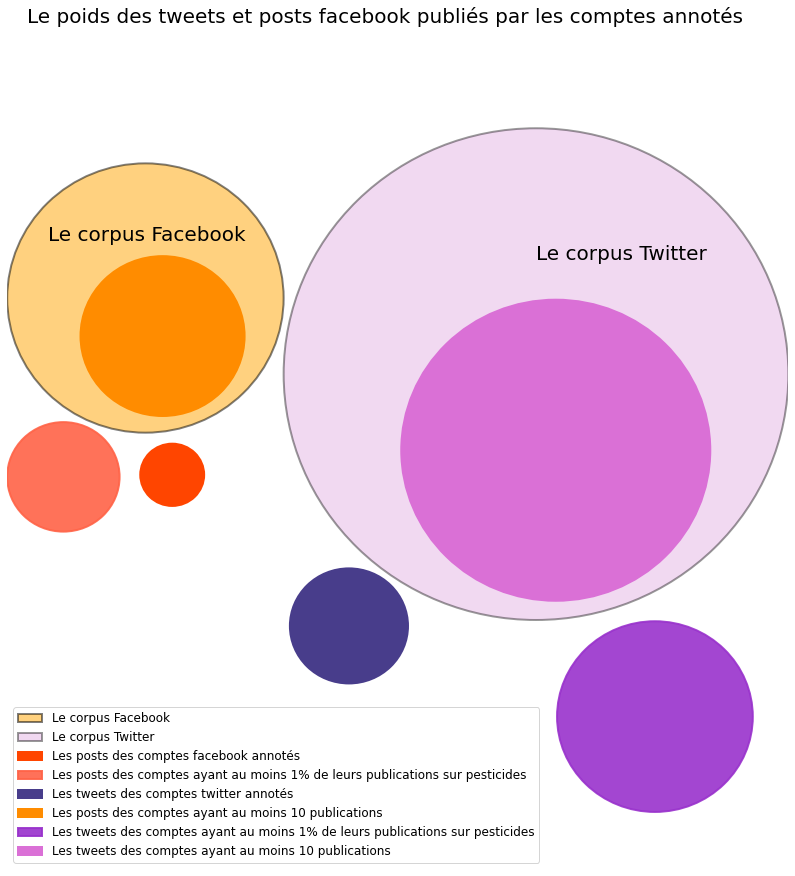

In [175]:
name_legend = []

fig, ax = plt.subplots(figsize=(14,14))

# Title
fig.suptitle("Le poids des tweets et posts facebook publiés par les comptes annotés", fontsize= 20)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles2
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles2:
    if circle.level == 2 and circle.ex["id"] == "corpus":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x, y+0.5), r, alpha=0.5, linewidth=2, facecolor="Orange", edgecolor="black"))
        label = circle.ex["name"]
        name_legend.append(label)
        plt.annotate(label, (x, y) ,size = 20, xytext = (x-0.25,y+ 0.65))
        
    elif circle.level == 3 and circle.ex["id"] == "sub_corpus":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x-0.1, y+0.4), r, alpha=1, linewidth=2, color="#FF8C00"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
    
    elif circle.level == 3 and circle.ex["id"] == "sub_sub_corpus":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x, y+0.03), r, alpha=0.9, linewidth=2, color="Tomato"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
            
    elif circle.level == 3 and circle.ex["id"] == "annoted_corpus":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x+0.15, y-0.15), r, alpha=1, linewidth=2, color="OrangeRed"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
        
    elif circle.level == 2 and circle.ex["id"] == "corpus_tw":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x, y+0.3), r, alpha=0.4, linewidth=2, facecolor="Plum", edgecolor="black"))
        label = circle.ex["name"]
        name_legend.append(label)
        plt.annotate(label, (x,y) ,size = 20, xytext = (x,y+ 0.6))
        
    elif circle.level == 3 and circle.ex["id"] == "sub_corpus_tw":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x-0.2, y+0.1), r, alpha=1, linewidth=2, color="#DA70D6"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
    
    elif circle.level == 3 and circle.ex["id"] == "sub_sub_corpus_tw":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x+0.7, y-0.6), r, alpha=0.9, linewidth=2, color="#9932CC"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
            
    elif circle.level == 3 and circle.ex["id"] == "annoted_corpus_tw":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x-0.3, y-0.7), r, alpha=1, linewidth=2, color="DarkSlateBlue"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
         
                


name_legende = [
    "Le corpus de posts facebook",
    "Le corpus des tweets", 
    "Les posts annotés",
    "Les posts des comptes ayant au moins 10 publications",
    "Les posts des comptes ayant au moins 1% de leurs publications sur pesticides",
    
    "Les tweets des comptes ayant au moins 10 publications",
    "Les tweets des comptes ayant au moins 1% de leurs publications sur pesticides",
    "Les tweets des comptes annotés"]

plt.legend(name_legend, loc=3, fontsize = 12, ncol = 1)


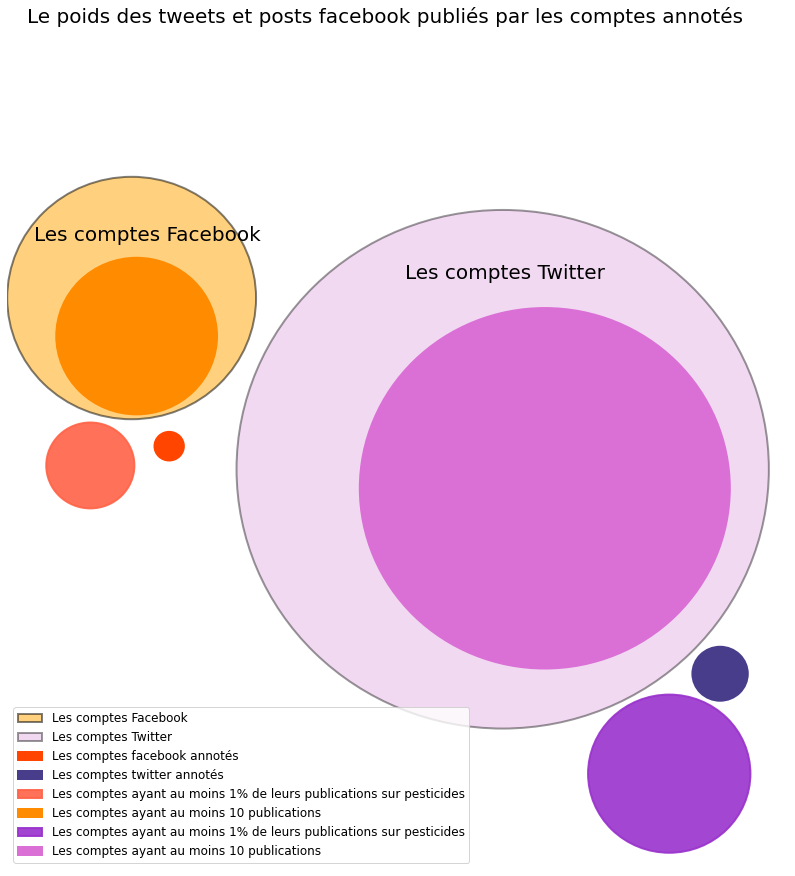

In [168]:
size_all_corpus = len(df)

data2 = [{'id': "all", 'name': 'Les comptes Facebook et Twitter', 'datum': size_all_corpus, "children" :[
         {'id': "corpus", 'name': 'Les comptes Facebook', 'datum': nb_fb_account, "children":[
             {'id': "sub_corpus", "name": 'Les comptes ayant au moins 10 publications', "datum" : nb_fb_with_10_posts},
          {'id': "sub_sub_corpus", "name": 'Les comptes ayant au moins 1% de leurs publications sur pesticides', 'datum': nb_fb_with_1percent_posts},
          {'id': "annoted_corpus", "name": 'Les comptes facebook annotés', 'datum':nb_fb_annoted_account}
         ]},
    {'id': "corpus_tw", 'name': 'Les comptes Twitter', 'datum': nb_tw_account, "children" :[
             {'id': "sub_corpus_tw", "name": 'Les comptes ayant au moins 10 publications', "datum" : nb_tw_with_10_posts},
          {'id': "sub_sub_corpus_tw", "name": 'Les comptes ayant au moins 1% de leurs publications sur pesticides', 'datum': nb_tw_with_1percent_posts},
          {'id': "annoted_corpus_tw", "name": 'Les comptes twitter annotés', 'datum':nb_tw_annoted_account}
        ]}
]
         }]
# Compute circle positions thanks to the circlify() function
circles2 = circlify.circlify(
    data2, 
    show_enclosure=False
)

name_legend = []

fig, ax = plt.subplots(figsize=(14,14))

# Title
fig.suptitle("Le poids des comptes annotés", fontsize= 20)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles2
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles2:
    if circle.level == 2 and circle.ex["id"] == "corpus":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x, y+0.5), r, alpha=0.5, linewidth=2, facecolor="Orange", edgecolor="black"))
        label = circle.ex["name"]
        name_legend.append(label)
        plt.annotate(label, (x, y) ,size = 20, xytext = (x-0.25,y+ 0.65))
        
    elif circle.level == 3 and circle.ex["id"] == "sub_corpus":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x-0.1, y+0.4), r, alpha=1, linewidth=2, color="#FF8C00"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
    
    elif circle.level == 3 and circle.ex["id"] == "sub_sub_corpus":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x+0.1, y+0.06), r, alpha=0.9, linewidth=2, color="Tomato"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
    elif circle.level == 3 and circle.ex["id"] == "annoted_corpus":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x+0.2, y), r, alpha=1, linewidth=2, color="OrangeRed"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
        
    elif circle.level == 2 and circle.ex["id"] == "corpus_tw":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x-0.05, y+0.05), r, alpha=0.4, linewidth=2, facecolor="Plum", edgecolor="black"))
        label = circle.ex["name"]
        name_legend.append(label)
        plt.annotate(label, (x,y) ,size = 20, xytext = (x-0.3,y+ 0.55))
        
    elif circle.level == 3 and circle.ex["id"] == "sub_corpus_tw":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x-0.15, y), r, alpha=1, linewidth=2, color="#DA70D6"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
    
    elif circle.level == 3 and circle.ex["id"] == "sub_sub_corpus_tw":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x+0.85, y-0.75), r, alpha=0.9, linewidth=2, color="#9932CC"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
            
    elif circle.level == 3 and circle.ex["id"] == "annoted_corpus_tw":
        x, y, r = circle
        #print(r*circle.ex["datum"])
        ax.add_patch( plt.Circle((x+0.8, y-0.7), r, alpha=1, linewidth=2, color="DarkSlateBlue"))
        label = circle.ex["name"]
        name_legend.append(label)
        #plt.annotate(label, (x,y ) ,size = 20)
        
    
                


name_legende = [
    "Le corpus de posts facebook",
    "Le corpus des tweets", 
    "Les posts annotés",
    "Les posts des comptes ayant au moins 10 publications",
    "Les posts des comptes ayant au moins 1% de leurs publications sur pesticides",
    
    "Les tweets des comptes ayant au moins 10 publications",
    "Les tweets des comptes ayant au moins 1% de leurs publications sur pesticides",
    "Les tweets des comptes annotés"]

plt.legend(name_legend, loc=3, fontsize = 12, ncol = 1)

